In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [159]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
...                   random_state=0)

In [160]:
y[y==0] = -1

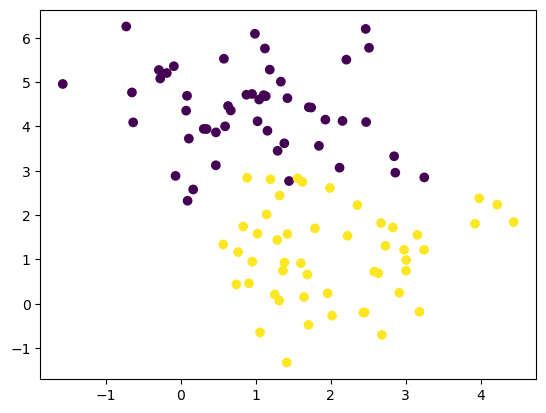

In [161]:
plt.scatter(X[:,0],X[:,1],c=y)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=0)

In [163]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [164]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [165]:
model.score(X_test,y_test)

0.9393939393939394

# Custom SVM

In [171]:
class SVM:
    def __init__(self, C=1.0,lr = 0.01):
        self.C = C # penalty
        self.W = 0 # weights
        self.b = 0 # bias
        self.lr = lr
        
    def hingeloss(self, W, b, X, y):
        loss = 0.0
        
        loss += .5 * np.dot(W, W.T)
        
        for i in range(X.shape[0]):
            ti = y[i] * (np.dot(W, X[i].T) + b)
            loss += self.C * max(0, 1-ti)

        return loss[0][0] # to get scalar value from matrix # [[loss]]
    
    def fit(self, X, y, batch_size=100, lr=0.01, maxItr=300):
        n_samples,n_features = X.shape
        W = np.zeros((1,n_features))
        b = 0
        losses = []
        for _ in range(maxItr):
            losses.append(self.hingeloss(W,b,X,y))
            dW = 0
            db = 0
            for Xi,yi in zip(X,y):
                ti = yi*(np.dot(W,Xi.T)+b)
                if ti <1:
                    dW+= self.C * Xi * yi
                    db+= self.C * yi
            W = W - self.lr * W +  self. lr * dW
            b = b +  self.lr*db
        self.W = W
        self.b = b
        
        return W, b, losses
    def predict(self,X):
        dist = (np.dot(self.W, X.T) + self.b)          
        return np.sign(dist)

    def score(self, X, y):
            yp = self.predict(X)
            return np.mean(yp == y)
    

In [172]:
model = SVM(C=1)
# if c (penalty), will be increased, then the margin will reduce because model will try to reduce the penalty by reducing the distance
W, b, losses = model.fit(X, y, maxItr=100)
model.score(X_test,y_test)

0.9393939393939394

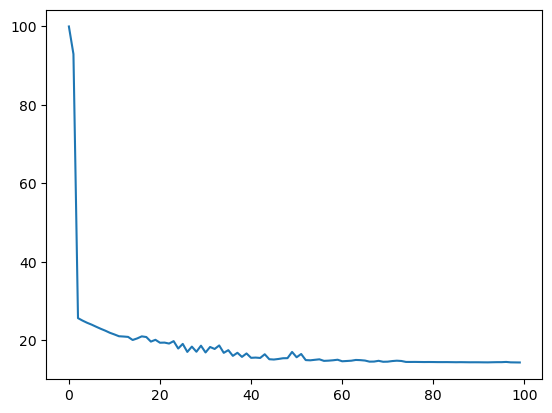

In [173]:
plt.plot(losses)

In [174]:
def plot_hyperplane(w1, w2, b):
    plt.figure(figsize=(12, 12))
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1 * x1 + b)/w2
    xp = -(w1 * x1 + b + 1)/w2
    xn = -(w1 * x1 + b - 1)/w2
    
    plt.plot(x1, x2, label="WX+B=0")
    plt.plot(x1, xp, label="WX+B=1")
    plt.plot(x1, xn, label="WX+B=-1")
    plt.legend()
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()


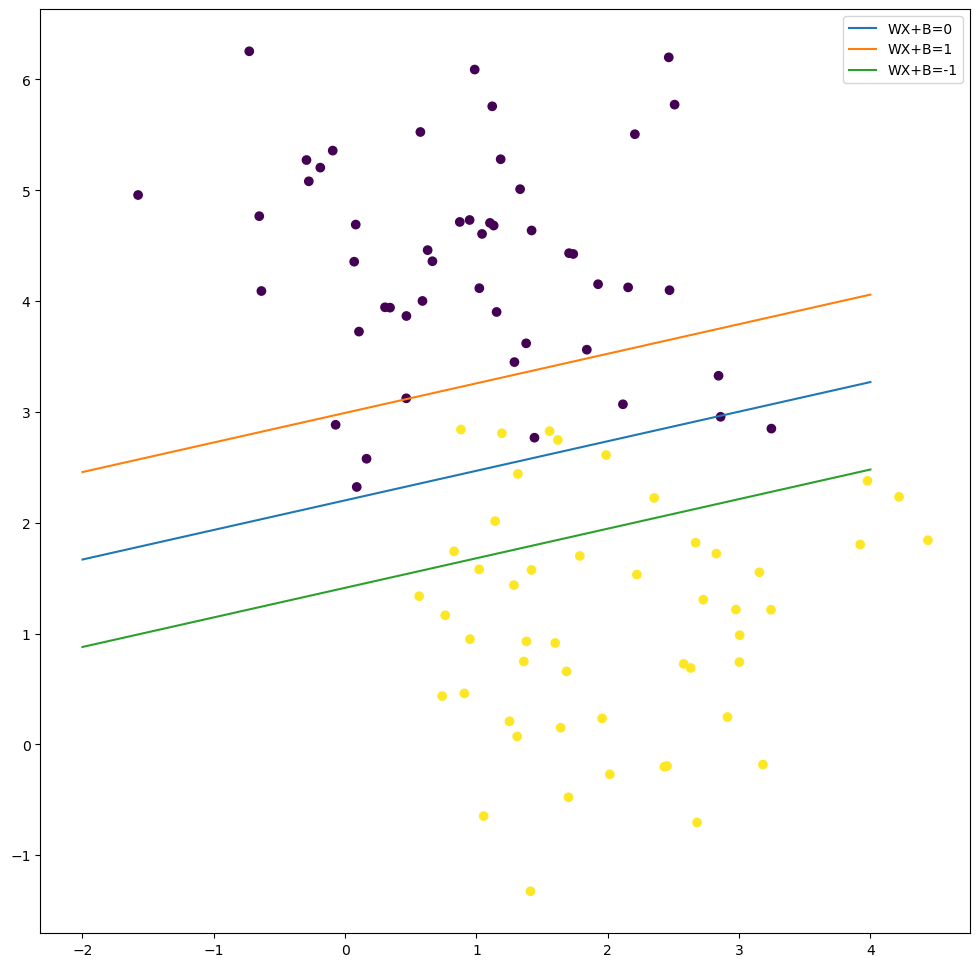

In [175]:
plot_hyperplane(W[0,0], W[0, 1], b)

In [176]:
model.predict(X_test[:10]),y_test[:10]

(array([[ 1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.]]),
 array([ 1,  1, -1, -1, -1,  1,  1, -1, -1, -1]))